In [1]:
import numpy as np
from keras.datasets import imdb
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
import matplotlib.pyplot as plt

In [2]:
# Load the IMDB dataset, keeping only 10,000 most frequent words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [5]:
# Function to vectorize the sequences (one-hot encoding)
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))  # Create an all-zero matrix
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1  # Set specific indices to 1
    return results

In [7]:
# Vectorize the training and test data
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)


In [8]:
# Vectorize the labels (convert them to numpy arrays of float32)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [9]:
# Split training data into training and validation sets
X_val = X_train[:10000]
partial_X_train = X_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [10]:
# Build the neural network model
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))  # First hidden layer with 16 units
model.add(layers.Dense(16, activation='relu'))  # Second hidden layer with 16 units
model.add(layers.Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification


C:\Users\91776\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Compile the model
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.001),
    loss=losses.binary_crossentropy,
    metrics=[metrics.binary_accuracy]
)

In [17]:
# Train the model using the training data, validation set to monitor overfitting
history = model.fit(
    partial_X_train,
    partial_y_train,
    epochs=3,  # Train for 3 epochs to avoid overfitting
    batch_size=512,
    validation_data=(X_val, y_val)
)


Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - binary_accuracy: 0.6295 - loss: 0.6410 - val_binary_accuracy: 0.8374 - val_loss: 0.4882
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - binary_accuracy: 0.8760 - loss: 0.4324 - val_binary_accuracy: 0.8766 - val_loss: 0.3607
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - binary_accuracy: 0.9037 - loss: 0.3066 - val_binary_accuracy: 0.8828 - val_loss: 0.3105


In [18]:
# Plot the training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

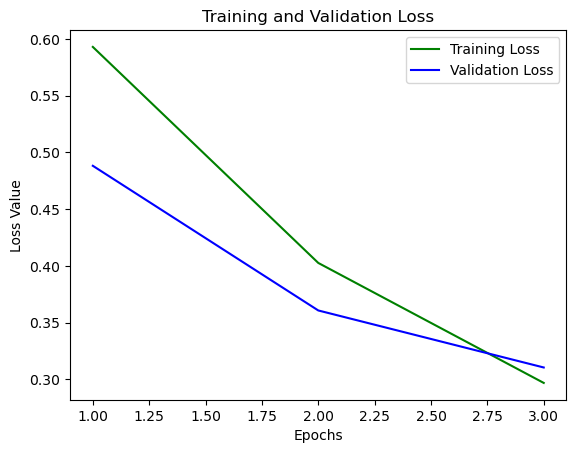

In [19]:
# Training and Validation Loss
plt.plot(epochs, loss_values, 'g', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

In [20]:
# Plot the training and validation accuracy
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']


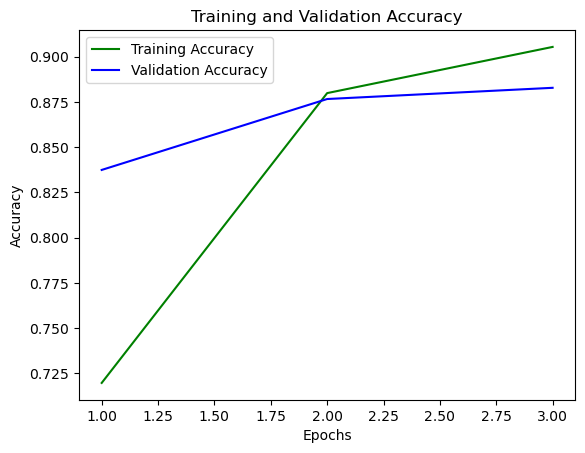

In [21]:
# Training and Validation Accuracy
plt.plot(epochs, acc_values, 'g', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'b', label="Validation Accuracy")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.8771 - loss: 0.3219
Test accuracy: 0.8788800239562988
Test loss: 0.31978124380111694


In [23]:
# Make predictions on the test data
predictions = model.predict(X_test)


782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step 


In [24]:
# Convert the predictions to binary (0 or 1)
y_pred = np.zeros(len(predictions))
for i, score in enumerate(predictions):
    y_pred[i] = np.round(score)

C:\Users\91776\AppData\Local\Temp\ipykernel_2400\917407350.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = np.round(score)


In [31]:
# Calculate the Mean Absolute Error (MAE) for the test predictions
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_pred, y_test)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 0.12112
